In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
full_train_data = pd.read_csv("../data/train.csv")
valid_ffv = full_train_data[full_train_data['FFV'].notna()]

two_star_ffv = valid_ffv[valid_ffv['SMILES'].str.count(r"\*") == 2]

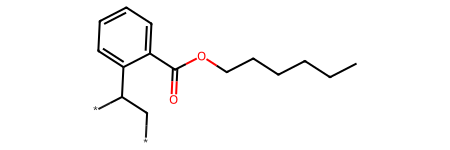

In [3]:
from data_gen_helpers import display_smiles
sample_smiles = two_star_ffv.loc[0, 'SMILES']

display_smiles(sample_smiles)

In [4]:
#https://github.com/rdkit/rdkit/issues/7716
from pyscf import gto, scf
from rdkit import Chem
from rdkit.Chem import rdDistGeom

sample_smiles = two_star_ffv.sample(1, random_state=1)['SMILES'].values[0]


def remove_asterisk(smiles):
    return smiles.replace('*', '').replace('()', '')

mol = Chem.rdmolfiles.MolFromSmiles(remove_asterisk(sample_smiles))
mol = Chem.AddHs(mol)

geometry = rdDistGeom.ETKDGv3()
Chem.rdDistGeom.EmbedMolecule(mol, geometry)

mol_xyz = Chem.MolToXYZBlock(mol).splitlines()[2:]
mol_xyz = '\n'.join(mol_xyz)

#https://pyscf.org/user/using.html
mymol = gto.Mole()
mymol.atom = mol_xyz
mymol.basis = 'sto-3g'

mymol.build()

mf = scf.RHF(mymol)
mf.kernel()
dm1 = mf.make_rdm1()
print(dm1)


converged SCF energy = -1161.15640154278
[[ 2.07025426e+00 -2.26587213e-01 -1.58336908e-02 ...  1.78307845e-04
  -1.05290459e-03 -1.69405380e-03]
 [-2.26587213e-01  8.65956616e-01  4.71392463e-02 ... -8.04941637e-04
   4.58611415e-03  6.67982545e-03]
 [-1.58336908e-02  4.71392463e-02  5.55490811e-01 ...  8.25833227e-04
  -7.65196466e-03 -9.52512464e-03]
 ...
 [ 1.78307845e-04 -8.04941637e-04  8.25833227e-04 ...  5.93295724e-01
  -2.74798814e-03  2.01978014e-04]
 [-1.05290459e-03  4.58611415e-03 -7.65196466e-03 ... -2.74798814e-03
   5.86922999e-01 -7.55430699e-02]
 [-1.69405380e-03  6.67982545e-03 -9.52512464e-03 ...  2.01978014e-04
  -7.55430699e-02  5.99056471e-01]]


In [ ]:
def optimize_ffv(smiles: str, basis: str = 'sto-3g', max_cycle: int = 50, conv: float = 1e-6, basis_set: str = 'sto-3g'):
    mol = Chem.rdmolfiles.MolFromSmiles(remove_asterisk(smiles))
    mol = Chem.AddHs(mol)
    
    geometry = rdDistGeom.ETKDGv3()
    Chem.rdDistGeom.EmbedMolecule(mol, geometry)
    mol_xyz = Chem.MolToXYZBlock(mol).splitlines()[2:]
    mol_xyz = '\n'.join(mol_xyz)
    
    mymol = gto.Mole()
    mymol.atom = mol_xyz
    mymol.basis = basis_set
    mymol.build()

    mf = scf.RHF(mymol)
    mf.conv_tol = conv
    mf.max_cycle = max_cycle
    mf.verbose = 4
    mf.kernel()
    return mf

mf_test = optimize_ffv(sample_smiles, max_cycle=5)
print(mf_test.mo_energy)

In [ ]:
from opt_helpers import calculate_polymer_energies
import opt_helpers
opt_helpers.verbose = 1

calculate_polymer_energies(two_star_ffv.loc[:1, "SMILES"], max_chain_length=60, method='dft', n_processes=2)

Generating polymer chains for 2 monomers...
Generating chains for monomer: *CC(*)c1ccccc1C(=O)OCCCCCC
19


The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information
The SMILES writer does not write stereochemical information


  Generated 27 polymer configurations
Generating chains for monomer: *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5ccc(N*)cc5)cc4)CCC(CCCCC)CC3)cc2)cc1
47
  Generated 2 polymer configurations
Total calculations to perform: 29
Using 2 parallel processes
Estimated time per calculation: 10-60 seconds
Processing batch 1/1 (29 calculations)
ETKDGv3 failed, trying basic ETKDG
ETKDGv3 failed, trying basic ETKDG
Sucessfully created molecule for *C(CCC(*)c1ccccc1C(=O)OCCCCCC)c1ccccc1C(=O)OCCCCCC
Starting dft calculation
ETKGDG failed, trying random coords
Sucessfully created molecule for *C(CCC(CC(CC(*)c1ccccc1C(=O)OCCCCCC)c1ccccc1C(=O)OCCCCCC)c1ccccc1C(=O)OCCCCCC)c1ccccc1C(=O)OCCCCCC
Starting dft calculation
